In [4]:
# imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [5]:
# helper functions
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def normalize(arr):
    arr = np.array(arr,float)
    return arr/np.sum(arr)

def dot(x,y):
    return np.sum(np.multiply(x,y))

def steady_state_prob(matrix):
    """
    This function calculates relative throughput from a probability matrix
    :param matrix: the probability matrix
    :return: A list of relative throughput values
    """
    a_list = []
    b_list = []
    for v in matrix:
        a_list.append(1)
        b_list.append(0)
    b_list.append(1)
    A = np.append(np.transpose(matrix) - np.identity(len(matrix)), [a_list], axis=0)
    b = np.transpose(np.array(b_list))
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [6]:
# examples

In [7]:
en = 3
ch = 3
P = np.array([.2,.4,.4])
E = np.array([[.5,.6,.4],[.2,.3,.1],[.4,.5,.3]])
# E = np.array([[.6,.9,.3],[.3,.5,.1],[.4,.1,.05]])
R = np.array([8.,6.,4.])
tol = .3
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[8. 6. 4.]
0.2


In [ ]:
en = 5
ch = 4
P = np.array([.3,.1,.2,.4])
# P = np.array([[.35,.15,.05,.45],[.3,.3,.2,.2],[.3,.4,.1,.2],[.2,.15,.25,.4]])
# P = steady_state_prob(P)
E = np.array([[.4,.6,.4,.3],[.3,.4,.4,.3],[.3,.2,.1,.4],[.1,.35,.3,.4],[.2,.4,.1,.3]])
R = np.array([7.,5.5,4.,6.,5.])
tol = .35
# print(P)
# print(E)
print(R)

In [9]:
en = 6
ch = 8
P = np.array([.3,.1,.2,.4,.3,.1,.3,.3])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[4.  3.5 4.  8.  2.  3.  4.  3.5 4.  6.  2.  3. ]
0.13


In [29]:
en = 12
ch = 10
P = np.array([.3,.1,.15,.35,.2,.1,.25,.2,.1,.25])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4,.4,.3],[.3,.4,.4,.3,.3,.35,.25,.4,.4,.25],[.3,.2,.1,.4,.3,.4,.4,.3,.35,.55],[.45,.5,.4,.55,.7,.45,.55,.35,.35,.55],[.2,.4,.1,.3,.4,.4,.3,.1,.1,.3],[.4,.6,.4,.3,.6,.4,.3,.1,.25,.4],[.4,.6,.4,.3,.1,.35,.3,.4,.1,.3],[.55,.45,.45,.3,.3,.35,.25,.4,.4,.1],[.3,.2,.1,.4,.3,.4,.4,.3,.2,.4],[.4,.3,.3,.5,.6,.4,.4,.35,.4,.6],[.2,.4,.1,.3,.4,.4,.3,.1,.4,.25],[.4,.6,.4,.3,.6,.4,.3,.1,.3,.4]])/2
R = np.array([4.,3.5,4.,8,2.,3.,4.,3.5,4.,6.,2.,3.])
tol = .2
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[4.  3.5 4.  8.  2.  3.  4.  3.5 4.  6.  2.  3. ]
0.13


In [11]:
# random example generator
en = 15
ch = 20
P = normalize(rd.rand(ch))
E = rd.rand(en,ch)/2
R = np.array(rd.randint(low=1,high=2*en,size=en),float)
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[ 7. 23. 15. 28. 27. 25. 27. 17. 25. 19. 28. 12. 27.  4. 18.]
0.18989816676480492


In [30]:
# getting optimal x using P
tol = .2
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(tol)
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.2
5.765517241379311 1.0 [0.] True 0.2
[0.         0.         0.         0.44137931 0.         0.
 0.55862069 0.         0.         0.         0.         0.        ]


In [31]:
# finding safe x by solving system of equations
xub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = xub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
print(ltemp.success)
x0 = np.transpose(row_normalize([ltemp.x]))
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe unit vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
c_arr = []
for i in range(500):
    c_arr.append(1.0-bernoulli(E[sample(x0)][sample(P)]))
c0 = np.mean(c_arr)
print(np.sum(x0))
print(x0.flatten())
print(c0,dot(x0.flatten(),R))

True
1.0
[0.44680851 0.         0.46808511 0.         0.         0.
 0.         0.08510638 0.         0.         0.         0.        ]
0.168 3.9574468085106385


In [37]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob conditions hold
alfa_c = 0.1 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)*R_sum];c = [c0]
b = []; enc = [];chnl = []
avg_rate = [dot(x[0],Rn)*R_sum]

In [38]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
val = 1 - e0*np.sum(e0); val = np.array([[i for i in val.flatten()]])
gama = 1.0/float(2.0*en)
alfa_c = alfa_c/math.sqrt(float(en))
for t in range(1,10000):
    enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P))
    b.append(bernoulli(E[enc[-1]][chnl[-1]]))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])  # c.append(dot(x[-1],np.matmul(E,yt)))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    # print(np.mean(ub),alfa_c*betat*np.mean(val),tol+(alfa_c*betat*err))
    alfact = alfa_c # /math.pow(float(t),0.5)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub + alfact*betat*val, b_ub = [tol+(alfact*betat*gama)],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),ltemp.success,end='\n')
    # print(np.mean(ub),alfa_c*betat*np.mean(val))

1 8.0 1.0 True
2 8.0 0.5 True
3 8.0 0.3333 True
4 8.0 0.25 True
5 8.0 0.2 True
6 6.34232 0.3333 True
7 4.76173 0.4286 True
8 6.22937 0.375 True
9 5.86963 0.4444 True
10 6.42677 0.5 True
11 6.5234 0.4545 True
12 6.5748 0.4167 True
13 5.51814 0.4615 True
14 5.74166 0.4286 True
15 4.30396 0.4667 True
16 4.8046 0.4375 True
17 5.04972 0.4118 True
18 5.21025 0.3889 True
19 4.38061 0.4211 True
20 4.63446 0.4 True
21 4.80352 0.381 True
22 4.92944 0.3636 True
23 5.02941 0.3478 True
24 5.11216 0.3333 True
25 5.1827 0.32 True
26 5.24417 0.3077 True
27 5.29865 0.2963 True
28 5.34759 0.2857 True
29 5.39204 0.2759 True
30 5.13669 0.3 True
31 5.18643 0.2903 True
32 5.23136 0.2812 True
33 5.27237 0.2727 True
34 5.3101 0.2647 True
35 5.34509 0.2571 True
36 5.37771 0.25 True
37 5.40831 0.2432 True
38 5.43714 0.2368 True
39 5.26579 0.2564 True
40 5.29638 0.25 True
41 5.3251 0.2439 True
42 5.35217 0.2381 True
43 5.3778 0.2326 True
44 5.40215 0.2273 True
45 5.25827 0.2444 True
46 5.10578 0.2609 True
47 5.1

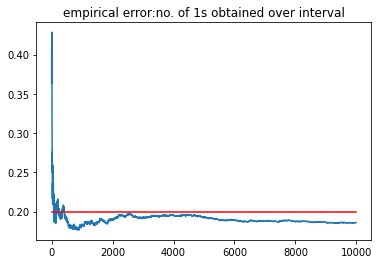

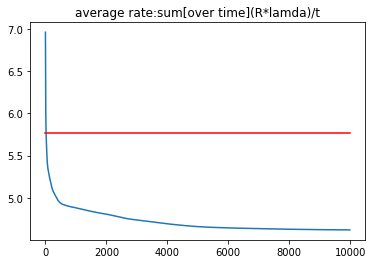

In [39]:
# plots of empirical error and rate
stat = 10
end = 10000
org_rate = dot(org_x,R)
error_plot = 1.0 - np.copy(b)
rate_plot = np.copy(avg_rate)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:end])
plt.plot([0,len(error_plot[stat:end])],[tol,tol],'r')
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:end])
plt.plot([0,len(error_plot[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [40]:
# starting and ending rate, error, x values
print(x0.flatten())
print('--------------------------------------------------------------------------')
print(x[end-2].flatten())
print(org_x)
print(error_plot[end-2],tol)
print(rate_plot[end-2],avg_rate[end-2],dot(org_x,R))

[0.44680851 0.         0.46808511 0.         0.         0.
 0.         0.08510638 0.         0.         0.         0.        ]
--------------------------------------------------------------------------
[0.85190787 0.         0.         0.14809213 0.         0.
 0.         0.         0.         0.         0.         0.        ]
[0.         0.         0.         0.44137931 0.         0.
 0.55862069 0.         0.         0.         0.         0.        ]
0.18583716743348724 0.2
4.61852084295385 4.592368504309975 5.765517241379311


0.30419642129951036


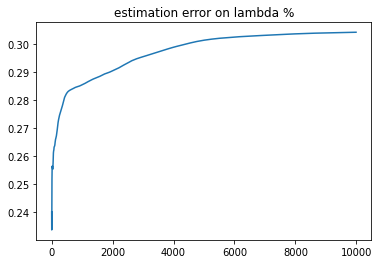

In [43]:
# error plot when compared to optimal x
err = []
for i in range(len(x)):
    err.append(np.sqrt(np.sum(np.square(org_x-x[i].flatten()))/en))
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on lambda %')
plt.show()